In [ ]:
# STEP 15 원-핫 인코딩과 교차 엔트로피 오차
# 출력값을 분류해서 하는 방식
# ex) 개 0, 고양이 1
# 목표 레이블 = target label, 학습을 해서 분류를 했는데, 0,1 두가지가 있다고 하면 [0, 1]이 label이다.
# ex) 4가지가 있다고 하면 [0, 1, 2, 3]인데 표현하면
            #  [1,   0,   0,   0],   
            #  [0,   1,   0,   0],   
            #  [0,   0,   1,   0],   
            #  [0,   0,   0,   1]
            #  이렇게 표현 된다.
#1501 원-핫 인코딩, tf.keras.utils.to_categorical(y
import tensorflow as tf
import numpy as np

y = np.arange(10) # integer label
print("y=", y)

# ont_hot 인코딩을 한다
# 출력을 정수가 주어진다.
# keras의 함수로 표현
y1 = tf.keras.utils.to_categorical(y) # keras one-hot label
print("y1=", y1)

# 텐서플로의 함수로 표현
##y2 = tf.one_hot(y, depth=10) # tensorflow one-hot label
##print("y2=", y2.numpy())


y= [0 1 2 3 4 5 6 7 8 9]
y1= [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
#1502   카테고리 교차 엔트로피 오차
# CCE = tf.keras.losses.CategoricalCrossentropy()
# 엔트로피 = 불확실성
# 엔트로피가 크다 = 모르는 정보가 많다.   h(x) = -logp(x),     h(x) = 확률, p(x) = 엔트로피
### 엔트로피 식 분석 ===>> 확률이랑 엔트로피랑 반비례 관계
# ex) 엔트로피(불확실성)가 낮을수록, 확률은 1에 가까워짐
# 엔트로피 기대값 = 엔트로피 * 확률       E(x) = -p(x) * logp(x)
### 결론 : 손실이 작은 방향으로 계산 하려고 함.
### CCE 는 엔트로피 기대값의 평균

import tensorflow as tf
import numpy as np

CCE = tf.keras.losses.CategoricalCrossentropy()
### t는 타겟 값, 원-핫 인코딩 되어 있다.
t= np.array([[1,   0,   0,   0],   #t[0]
             [0,   1,   0,   0],   #t[1]
             [0,   0,   1,   0],   #t[2]
             [0,   0,   0,   1]])  #t[3]

### y는 학습 모델로 계산한 값
y =np.array([[0.4, 0.3, 0.2, 0.1], #y[0]
             [0.1, 0.3, 0.2, 0.4]])#y[1]

### 따라서 결과값인 y와 타겟값 t의 차이가 손실

#1
#1 출력값(CCE)을 보니 t[0]와 y[0]의 손실이 제일 작다 = 제일 근접하다
print("CCE(t[i], y[0])")
print("CCE(t[0], y[0])=", CCE(t[0], y[0]).numpy() ) 
print("CCE(t[1], y[0])=", CCE(t[1], y[0]).numpy() )
print("CCE(t[2], y[0])=", CCE(t[2], y[0]).numpy() )
print("CCE(t[3], y[0])=", CCE(t[3], y[0]).numpy() ) 

#2
print("CCE(t[i], y[1])")
print("CCE(t[0], y[1])=", CCE(t[0], y[1]).numpy() ) 
print("CCE(t[1], y[1])=", CCE(t[1], y[1]).numpy() )
print("CCE(t[2], y[1])=", CCE(t[2], y[1]).numpy() )
print("CCE(t[3], y[1])=", CCE(t[3], y[1]).numpy() )

#3
print("CCE(np.vstack((t[1], t[1])), y)=",
       CCE(np.vstack((t[1], t[1])), y).numpy() )


CCE(t[i], y[0])
CCE(t[0], y[0])= 0.916290731874155
CCE(t[1], y[0])= 1.203972804325936
CCE(t[2], y[0])= 1.6094379124341003
CCE(t[3], y[0])= 2.3025850929940455
CCE(t[i], y[1])
CCE(t[0], y[1])= 2.3025850929940455
CCE(t[1], y[1])= 1.203972804325936
CCE(t[2], y[1])= 1.6094379124341003
CCE(t[3], y[1])= 0.916290731874155
CCE(np.vstack((t[1], t[1])), y)= 1.203972804325936


In [ ]:
# 카테고리 교차 엔트로피 오차
#1503 SCE = tf.keras.losses.SparseCategoricalCrossentropy()
import tensorflow as tf
import numpy as np

# Sparse matrix
# 행렬에서 0이 아닌 것(1 부분)만 표로 나타냄 
# 여기서는 1이 있는 것만 표시
SCE = tf.keras.losses.SparseCategoricalCrossentropy()

# 타겟 벨류는 [0, 1, 2, 3], 이것들은 인덱스이다.
t = tf.convert_to_tensor([0, 1, 2, 3])
# 학습모델에서 계산한 값
y = tf.convert_to_tensor([[0.4, 0.3, 0.2, 0.1], #y[0]
                         [0.1, 0.3, 0.2, 0.4]])#y[1]

#1
print("SCE(t[i], y[0])")
print("SCE(t[0], y[0])=", SCE(t[0], y[0]).numpy() ) 
print("SCE(t[1], y[0])=", SCE(t[1], y[0]).numpy() )
print("SCE(t[2], y[0])=", SCE(t[2], y[0]).numpy() )
print("SCE(t[3], y[0])=", SCE(t[3], y[0]).numpy() ) 

#2
print("SCE(t[i], y[1])")
print("SCE(t[0], y[1])=", SCE(t[0], y[1]).numpy() ) 
print("SCE(t[1], y[1])=", SCE(t[1], y[1]).numpy() )
print("SCE(t[2], y[1])=", SCE(t[2], y[1]).numpy() )
print("SCE(t[3], y[1])=", SCE(t[3], y[1]).numpy() )

#3
print("SCE(tf.stack((t[1], t[1])), y)=",
       SCE(tf.stack((t[1], t[1])), y).numpy() )


SCE(t[i], y[0])
SCE(t[0], y[0])= 0.91629076
SCE(t[1], y[0])= 1.2039728
SCE(t[2], y[0])= 1.609438
SCE(t[3], y[0])= 2.3025851
SCE(t[i], y[1])
SCE(t[0], y[1])= 2.3025851
SCE(t[1], y[1])= 1.2039728
SCE(t[2], y[1])= 1.609438
SCE(t[3], y[1])= 0.91629076
SCE(tf.stack((t[1], t[1])), y)= 1.2039728


In [ ]:
# 1504 이진 교차 엔트로피 오차
# BCE = tf.keras.losses.BinaryCrossentropy()
import tensorflow as tf
import numpy as np

BCE = tf.keras.losses.BinaryCrossentropy()
## 각각의 label에 대해서 원핫 인코딩하므로 지금 y는 2개라서 4개인듯
t= np.array([[1,   0,   0,   0],   #t[0]
             [0,   1,   0,   0],   #t[1]
             [0,   0,   1,   0],   #t[2]
             [0,   0,   0,   1]])  #t[3]

y =np.array([[0.4, 0.3, 0.2, 0.1], #y[0]
             [0.1, 0.3, 0.2, 0.4]])#y[1]
#1
print("BCE(t[i], y[0])")
print("BCE(t[0], y[0])=", BCE(t[0], y[0]).numpy() )
print("BCE(t[1], y[0])=", BCE(t[1], y[0]).numpy() )
print("BCE(t[2], y[0])=", BCE(t[2], y[0]).numpy() )
print("BCE(t[3], y[0])=", BCE(t[3], y[0]).numpy() ) 

#2
print("BCE(t[i], y[1])")
print("BCE(t[0], y[1])=", BCE(t[0], y[1]).numpy() ) 
print("BCE(t[1], y[1])=", BCE(t[1], y[1]).numpy() )
print("BCE(t[2], y[1])=", BCE(t[2], y[1]).numpy() )
print("BCE(t[3], y[1])=", BCE(t[3], y[1]).numpy() )

#3
print("BCE(np.vstack((t[0], t[0])), y)=",
       BCE(np.vstack((t[0], t[0])), y).numpy() )


BCE(t[i], y[0])
BCE(t[0], y[0])= 0.4003672784541813
BCE(t[1], y[0])= 0.5108254397382338
BCE(t[2], y[0])= 0.6455745187904711
BCE(t[3], y[0])= 0.8483069443724252
BCE(t[i], y[1])
BCE(t[0], y[1])= 0.8483069443724252
BCE(t[1], y[1])= 0.5108254397382338
BCE(t[2], y[1])= 0.6455745187904711
BCE(t[3], y[1])= 0.40036727845418124
BCE(np.vstack((t[0], t[0])), y)= 0.6243371114133032


In [ ]:
#1505 BCE = tf.keras.losses.BinaryCrossentropy()
import tensorflow as tf
import numpy as np

BCE = tf.keras.losses.BinaryCrossentropy()
## 1이 2개씩 있으므로 원핫인코딩은 아니다.
# 목표치가 
t= np.array([[1,   1,   0,   0],   #t[0]
             [0,   1,   1,   0],   #t[1]
             [0,   0,   1,   1],   #t[2]
             [0,   1,   0,   1]])  #t[3]

y =np.array([[0.4, 0.3, 0.2, 0.1], #y[0]
             [0.1, 0.3, 0.2, 0.4]])#y[1]
#1
print("BCE(t[i], y[0])")
print("BCE(t[0], y[0])=", BCE(t[0], y[0]).numpy() ) 
print("BCE(t[1], y[0])=", BCE(t[1], y[0]).numpy() )
print("BCE(t[2], y[0])=", BCE(t[2], y[0]).numpy() )
print("BCE(t[3], y[0])=", BCE(t[3], y[0]).numpy() ) 

#2
print("BCE(t[i], y[1])")
print("BCE(t[0], y[1])=", BCE(t[0], y[1]).numpy() ) 
print("BCE(t[1], y[1])=", BCE(t[1], y[1]).numpy() )
print("BCE(t[2], y[1])=", BCE(t[2], y[1]).numpy() )
print("BCE(t[3], y[1])=", BCE(t[3], y[1]).numpy() )

#3
print("BCE(np.vstack((t[0], t[0])), y)=",
       BCE(np.vstack((t[0], t[0])), y).numpy() )


BCE(t[i], y[0])
BCE(t[0], y[0])= 0.6121916959319459
BCE(t[1], y[0])= 0.8573989362682357
BCE(t[2], y[0])= 1.194880440902427
BCE(t[3], y[0])= 1.0601313618501897
BCE(t[i], y[1])
BCE(t[0], y[1])= 1.0601313618501897
BCE(t[1], y[1])= 0.8573989362682357
BCE(t[2], y[1])= 0.7469407749841832
BCE(t[3], y[1])= 0.6121916959319459
BCE(np.vstack((t[0], t[0])), y)= 0.8361615288910678


In [ ]:
# STEP 활성화 함수
# 대표적으로 sigmoid, tanh, softmax, linear가 있는데 뭔지 알고 선택의 문제
#1601 
import tensorflow as tf
import numpy as np

x = tf.constant([-10, -1.0, 0.0, 1.0, 10], dtype = tf.float32)

y1 = tf.keras.activations.linear(x) 
y2 = tf.keras.activations.sigmoid(x)
y3 = tf.keras.activations.tanh(x)
y4 = tf.keras.activations.relu(x)
y5 = tf.keras.layers.LeakyReLU(alpha=0.1)(x)
y6 = tf.keras.activations.softmax(tf.reshape(x, shape=(1, -1)))

##linear = tf.keras.activations.get('linear')
##y1 = linear(x)
##
##sigmoid = tf.keras.activations.get('sigmoid')
##y2 = sigmoid(x)
##
##tanh = tf.keras.activations.get('tanh')
##y3 = tanh(x)
##
##relu = tf.keras.activations.get('relu')
##y4 = relu(x)
##
##y5 = relu(x, alpha=0.1) # LeakyReLU
##softmax = tf.keras.activations.get('softmax')
##y6 = softmax(tf.reshape(x, shape=(1, -1)))

print("y1=", y1.numpy())
print("y2=", y2.numpy())
print("y3=", y3.numpy())
print("y4=", y4.numpy())
print("y5=", y5.numpy())
print("y6=", y6.numpy())
print("sum(y6)=", np.sum(y6.numpy())) # 1.0


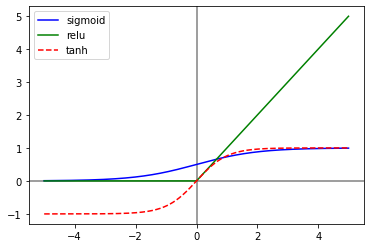

In [ ]:
## 활성화함수 가시화
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# sigmoid는 0~1
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def relu(x):
  if x < 0: rx = 0
  else : rx = x
  return rx

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu_x = [relu(z) for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, relu_x, 'g-', label='relu')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

In [ ]:
# STEP 17 분류 성능 평가
#1701
import tensorflow as tf
import numpy as np

#1 목표값
y_true = np.array([[1, 0, 0], #0
                   [0, 1, 0], #1
                   [0, 0, 1], #2
                   [1, 0, 0], #0
                   [0, 1, 0], #1
                   [0, 0, 1]]);#2

# 출력값
# binary: 1 above threshold=0.5, 0 below threshold= 0.5                           
y_pred = np.array([[0.3, 0.6, 0.1], #1
                   [0.6, 0.3, 0.1], #0
                   [0.1, 0.3, 0.6], #2
                   [0.3, 0.6, 0.1], #1
                   [0.1, 0.6, 0.3], #1
                   [0.3, 0.1, 0.6]]);#2
###accuracy1= tf.Tensor([0.33333334 0.33333334 1.         0.33333334 1.         1.        ], shape=(6,), dtype=float32)
### 목표값 0번째는 1, 0, 0 인데 출력값 1은 저 해당값이 0.3이므로 0.3이 출력

#2
accuracy1 =tf.keras.metrics.binary_accuracy(y_true, y_pred)
print("accuracy1=", accuracy1)

#2-1
## m.total은 오답 오답 정답(기준 0.5) 이걸 계산해서 정답으로 나타난 수치
## m.count는 출력값을 보니까 3 * 6개
## accuracy = total / count
# update_state() : 배치의 레이블과 예측을 기반으로 변수를 업데이트합니다
m= tf.keras.metrics.BinaryAccuracy()
m.update_state(y_true, y_pred)
# m.total = tf.reduce_sum(accuracy1)
# m.count = accuracy1.shape[0]
accuracy2 = m.result() # m.total/m.count
print("m.total={}, m.count={}".format(m.total.numpy(), m.count.numpy()))
print("accuracy2=", accuracy2.numpy())

###flatten은 2차원을 1차원으로 만든다. 직렬화 시킴
#3: calculate confusion_matrix, C
y_true = y_true.flatten()
y_pred = np.cast['int'](y_pred.flatten()>0.5)

##y_true= tf.reshape(y_true, [y_true.shape[0]*y_true.shape[1]] )
##y_pred= tf.cast(y_pred>0.5, y_true.dtype)
##y_pred= tf.reshape(y_pred,  shape= y_true.shape )

##y_true= tf.keras.backend.flatten(y_true)
##y_pred= tf.cast(y_pred>0.5, tf.int32)
##y_pred= tf.keras.backend.flatten(y_pred)

print("y_true=",y_true)
print("y_pred=",y_pred)
##confusion_matrix 참, 거짓을 매트릭스로 나타냄
## falttern을 해놓고 해야함
C = tf.math.confusion_matrix(y_true, y_pred)
print("confusion_matrix(C)=", C)

#4:
m = tf.keras.metrics.Accuracy()
m.update_state(y_true, y_pred)
print("m.total={}, m.count={}".format(m.total.numpy(), m.count.numpy()))
accuracy3 = m.result()  # m.total/m.count
print("accuracy3=", accuracy3.numpy())

#5 True, Positive 계산하는거
#5-1
m = tf.keras.metrics.TruePositives()
m.update_state(y_true, y_pred)
tp = m.result()  # m.true_positives 
print("tp =", tp.numpy())

#5-2
m = tf.keras.metrics.TrueNegatives()
m.update_state(y_true, y_pred)
tn = m.result() # m.accumulator[0] 
print("tn=", tn.numpy())

#5-3
m = tf.keras.metrics.FalsePositives()
m.update_state(y_true, y_pred)
fp = m.result() # m.accumulator[0] sms
print("fp=", fp.numpy())

#5-4
m = tf.keras.metrics.FalseNegatives()
m.update_state(y_true, y_pred)
fn = m.result()# m.accumulator[0]  
print("fn=", fn.numpy())

accuracy4  = (tp + tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall    = tp/(tp+fn)
f1 = 2*tp/(2*tp + fp + fn) # harmonic mean of precision and recall
print("accuracy4 =", accuracy4.numpy())
print("precision =",precision.numpy())
print("recall =",   recall.numpy())
print("f1 score =", f1.numpy()) 
#6
#6-1
m = tf.keras.metrics.Precision()
m.update_state(y_true, y_pred)
print("m.true_positives=", m.true_positives.numpy())
print("m.false_positives", m.false_positives.numpy())
print("precision=", m.result().numpy())

#6-2
m = tf.keras.metrics.Recall()
m.update_state(y_true, y_pred)
print("m.true_positives=", m.true_positives.numpy())
print("m.false_negatives", m.false_negatives.numpy())
print("recall=", m.result().numpy())


accuracy1= tf.Tensor([0.33333334 0.33333334 1.         0.33333334 1.         1.        ], shape=(6,), dtype=float32)
m.total=12.0, m.count=18.0
accuracy2= 0.6666667
y_true= [1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1]
y_pred= [0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1]
confusion_matrix(C)= tf.Tensor(
[[9 3]
 [3 3]], shape=(2, 2), dtype=int32)
m.total=12.0, m.count=18.0
accuracy3= 0.6666667
tp = 3.0
tn= 9.0
fp= 3.0
fn= 3.0
accuracy4 = 0.6666667
precision = 0.5
recall = 0.5
f1 score = 0.5
m.true_positives= [3.]
m.false_positives [3.]
precision= 0.5
m.true_positives= [3.]
m.false_negatives [3.]
recall= 0.5


In [ ]:
#1702
import tensorflow as tf
import numpy as np
#1
##y_true = np.array([0, 1, 2, 0, 1, 2])
##y_true = tf.keras.utils.to_categorical(y_true) # one-hot
y_true = np.array([[1, 0, 0], #0
                   [0, 1, 0], #1
                   [0, 0, 1], #2
                   [1, 0, 0], #0
                   [0, 1, 0], #1
                   [0, 0, 1]]);#2
               
y_pred = np.array([[0.3, 0.6, 0.1],  #1,
                   [0.6, 0.3, 0.1],  #0
                   [0.1, 0.3, 0.6],  #2
                   [0.3, 0.6, 0.1],  #1
                   [0.1, 0.6, 0.3],  #1
                   [0.3, 0.1, 0.6]]);#2
num_class = y_true.shape[1] # 3

#2: C and TOP_k
#2-1: threshold, and C in # 3-1, #4-1, and #6 in [step1701]
### argmax == 가장 큰 값의 인덱스
y_true1 = np.argmax(y_true, axis=1).flatten()
y_pred1 = np.argmax(np.cast['int'](y_pred>0.5), axis=1).flatten()
### argmax로 confusion_matrix 생성 
C = tf.math.confusion_matrix(y_true1, y_pred1)
print("y_true1=",y_true1) # y_true1= [0 1 2 0 1 2]
print("y_pred1=",y_pred1) # y_pred1= [1 0 2 1 1 2]
print("confusion_matrix(C)=", C)

#2-2: to find top-k index, in #3-2, #4-2
### argsort
### a.argsort()는 어레이 a를 정렬하는 인덱스의 어레이 [1 0 3 2]를 반환합니다.
k=2
indx = tf.argsort(y_pred, axis=1, direction='DESCENDING')
print("index = ", indx)
TOP_k = indx[:,:k]
print("TOP_k = ", TOP_k)

# 2-2 출력 결과
# k = 0 일때는 가장 큰 값
# 1 0 2 1 1 2
# k = 1 일때는 두번째 큰 값
# 0 1 1 0 2 0
# k = 2 일때는 그다음 큰값
# 2 2 0 2 0 1

# index =  tf.Tensor(
# [[1 0 2]
#  [0 1 2]
#  [2 1 0]
#  [1 0 2]
#  [1 2 0]
#  [2 0 1]], shape=(6, 3), dtype=int32)
# TOP_k =  tf.Tensor(
# [[1 0]
#  [0 1]
#  [2 1]
#  [1 0]
#  [1 2]
#  [2 0]], shape=(6, 2), dtype=int32)


#3
print("In each class, precision!")
# 3-2 는 너무 어려워 pass
###########################이것만 공부###################################
#3-1: binary(1 above threshold=0.5, 0 below threshold= 0.5)  
for i in range(num_class):
    m = tf.keras.metrics.Precision(class_id = i)
    m.update_state(y_true, y_pred)
    tp = m.true_positives.numpy()
    fp = m.false_positives.numpy()
    p = m.result().numpy()
    print(" p_{} ={}, tp={}, fp= {}".format(i,p, tp, fp))
    
#3-2: the top-k classes with the highest predicted values
print("In each class, precision with top_k=", k)
for i in range(num_class):
    m = tf.keras.metrics.Precision(top_k=k, class_id = i)
    m.update_state(y_true, y_pred)
    tp = m.true_positives.numpy()
    fp = m.false_positives.numpy()
    p = m.result().numpy()
    print(" p_{} ={}, tp={}, fp= {}".format(i,p, tp, fp))
#4 
print("In each class, recall!")
#4-1: binary(1 above threshold=0.5, 0 below threshold= 0.5)
for i in range(num_class):
    m = tf.keras.metrics.Recall(class_id = i)
    m.update_state(y_true, y_pred)
    tp = m.true_positives.numpy()
    fn = m.false_negatives.numpy()
    r = m.result().numpy()
    print(" recall_{} ={}, tp={}, fn= {}".format(i,r, tp, fn))

#4-2: the top-k classes with the highest predicted values
print("In each class, recall with top_k=", k)
for i in range(num_class):
    m = tf.keras.metrics.Recall(top_k=k, class_id = i)
    m.update_state(y_true, y_pred)
    r = m.result().numpy()
    print(" recall_{} ={}, tp={}, fn= {}".format(i,r, tp, fn))


y_true1= [0 1 2 0 1 2]
y_pred1= [1 0 2 1 1 2]
confusion_matrix(C)= tf.Tensor(
[[0 2 0]
 [1 1 0]
 [0 0 2]], shape=(3, 3), dtype=int32)
index =  tf.Tensor(
[[1 0 2]
 [0 1 2]
 [2 1 0]
 [1 0 2]
 [1 2 0]
 [2 0 1]], shape=(6, 3), dtype=int32)
TOP_k =  tf.Tensor(
[[1 0]
 [0 1]
 [2 1]
 [1 0]
 [1 2]
 [2 0]], shape=(6, 2), dtype=int32)
In each class, precision!
 p_0 =0.0, tp=[0.], fp= [1.]
 p_1 =0.3333333432674408, tp=[1.], fp= [2.]
 p_2 =1.0, tp=[2.], fp= [0.]
In each class, precision with top_k= 2
 p_0 =0.5, tp=[2.], fp= [2.]
 p_1 =0.4000000059604645, tp=[2.], fp= [3.]
 p_2 =0.6666666865348816, tp=[2.], fp= [1.]
In each class, recall!
 recall_0 =0.0, tp=[0.], fn= [2.]
 recall_1 =0.5, tp=[1.], fn= [1.]
 recall_2 =1.0, tp=[2.], fn= [0.]
In each class, recall with top_k= 2
 recall_0 =1.0, tp=[2.], fn= [0.]
 recall_1 =1.0, tp=[2.], fn= [0.]
 recall_2 =1.0, tp=[2.], fn= [0.]


In [ ]:
#1703  ----skip
import tensorflow as tf
import numpy as np

#1
y_true = np.array([0, 1, 2, 0, 1, 2])
y_pred = np.array([1, 0, 2, 1, 1, 2])

#2 
m = tf.keras.metrics.Accuracy()
m.update_state(y_true, y_pred)  #m.count = 3, m.total=6
print("accuracy from f.keras.metrics.Accuracy()=", m.result().numpy() )

#3
C = tf.math.confusion_matrix(y_true, y_pred)
print("confusion_matrix=", C)

correct = tf.linalg.diag_part(C)
col_sum = tf.reduce_sum(C, axis=0)
row_sum = tf.reduce_sum(C, axis=1)
total   = tf.reduce_sum(C)  #  len(y_true), len(y_pred)

accuracy    = tf.reduce_sum(correct)/total
precision_i = correct/col_sum
recall_i    = correct/row_sum
f1_i = 2*(precision_i*recall_i)/(precision_i+recall_i) # harmonic mean of precision and recall
f1_i = tf.where(tf.math.is_nan(f1_i), tf.zeros_like(f1_i), f1_i) # nan to 0.0
print("accuracy=",    accuracy.numpy())
print("precision_i=", precision_i.numpy())
print("recall_i=",    recall_i.numpy())
print("f1_i=",    f1_i.numpy())

#4:  micro, macro, weighted avg in precision, recall 
tp = tf.reduce_sum(correct)    # notice : correct pairs such as (0,0), (1,1), (2,2)
fp = tf.reduce_sum(col_sum - correct) # in this case, fp == fn
fn = tf.reduce_sum(row_sum - correct) 
precision = tp/(tp + fp)  
recall    = tp/(tp + fn)

count = tf.math.bincount(y_true) # support  in sklearn.metrics
print("count =", count)
print("precision(micro avg)=", precision.numpy())
print("precision(macro avg)=", tf.reduce_sum(precision_i)/precision_i.shape[0])
w=  tf.cast(count, dtype = tf.float64)/y_true.shape[0]  # tf.cast(total, dtype = tf.float64)
weightedAvgP = tf.reduce_sum(precision_i*w)
print("precision(weighted avg)=", weightedAvgP)

print("recall(micro avg)=", recall.numpy())
print("recall(macro avg)=", tf.reduce_sum(recall_i)/recall_i.shape[0])
weightedAvgR = tf.reduce_sum(recall_i*w)
print("recall(weighted avg)=", weightedAvgR)

#5: pip install sklearn
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score,precision_score, recall_score
print("--- sklearn.metrics ---")
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

print("accuracy=", accuracy_score(y_true, y_pred)) # normalize=True
print("precision_i=", precision_score(y_true, y_pred, average=None))
print("precision(micro avg)=", precision_score(y_true, y_pred, average='micro'))
print("precision(macro avg)=", precision_score(y_true, y_pred, average='macro'))

print("recall_i=", recall_score(y_true, y_pred, average=None))
print("recall(micro avg)=", recall_score(y_true, y_pred, average='micro'))
print("recall(macro avg)=", recall_score(y_true, y_pred, average='macro'))


In [ ]:
#1704  ----skip
import tensorflow as tf
import numpy as np
#1
##y_true = np.array([0, 1, 2, 0, 1, 2])
##y_true = tf.keras.utils.to_categorical(y_true) # one-hot
y_true = np.array([[1, 0, 0], #0
                   [0, 1, 0], #1
                   [0, 0, 1], #2
                   [1, 0, 0], #0
                   [0, 1, 0], #1
                   [0, 0, 1]]);#2
          
y_pred = np.array([[0.3, 0.6, 0.1], #1
                   [0.6, 0.3, 0.1], #0
                   [0.1, 0.3, 0.6], #2
                   [0.3, 0.6, 0.1], #1
                   [0.1, 0.6, 0.3], #1
                   [0.3, 0.1, 0.6]]);#2

#2: using one-hot encoding in y_true
print("CategoricalAccuracy!")

#2-1
accuracy2_1= tf.keras.metrics.categorical_accuracy(y_true, y_pred)
print("accuracy2_1=", accuracy2_1.numpy())
#2-2
m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(y_true, y_pred)
# m.total = tf.reduce_sum(accuracy2_1)
# m.count = accuracy2_1.shape[0]
accuracy2_2 = m.result() # m.total/m.count
print("m.total={}, m.count={}".format(m.total.numpy(),m.count.numpy()))
print("accuracy2_2=", accuracy2_2.numpy())

#2-3
top_k = 2 
accuracy2_3 = tf.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=top_k) 
print("top_k={}, accuracy2_3={}".format(top_k, accuracy2_3))

#2-4
m = tf.keras.metrics.TopKCategoricalAccuracy(k=top_k) # default k = 5
m.update_state(y_true, y_pred)
# m.total = tf.reduce_sum(accuracy2_3)
# m.count = accuracy2_3.shape[0]
accuracy2_4 = m.result()
print("m.total={}, m.count={}".format(m.total.numpy(),m.count.numpy()))
print("top_k={}, accuracy2_4={}".format(top_k, accuracy2_4.numpy()))

#3: using integer label in y_true
print("SparseCategoricalAccuracy!")
y_true = tf.argmax(y_true, axis = 1) # np.argmax(y_true, axis = 1)
y_true = tf.reshape(y_true, (-1,1))  # np.reshape(y_true, (-1, 1))
print("y_true=", y_true)

#3-1
accuracy3_1= tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)
print("accuracy3_1=", accuracy3_1.numpy())
#3-2
m = tf.keras.metrics.SparseCategoricalAccuracy()
m.update_state(y_true, y_pred)
# m.total = tf.reduce_sum(accuracy3_1)
# m.count = accuracy3_1.shape[0]
accuracy3_2 = m.result() # m.total/m.count
print("m.total={}, m.count={}".format(m.total.numpy(),m.count.numpy()))
print("accuracy3_2=", accuracy3_2.numpy())

#3-3
top_k = 2 
accuracy3_3 = tf.keras.metrics.sparse_top_k_categorical_accuracy(y_true, y_pred, k=top_k) 
print("top_k={}, accuracy3_3={}".format(top_k, accuracy3_3))

#3-4
m = tf.keras.metrics.SparseTopKCategoricalAccuracy(k=top_k) # default k = 5
m.update_state(y_true, y_pred)
# m.total = tf.reduce_sum(accuracy3_3)
# m.count = accuracy3_3.shape[0]
accuracy3_4 = m.result()
print("m.total={}, m.count={}".format(m.total.numpy(),m.count.numpy()))
print("top_k={}, accuracy3_4={}".format(top_k, accuracy3_4.numpy()))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
1/1 - 0s - loss: 0.0048 - accuracy: 1.0000 - 110ms/epoch - 110ms/step
test_loss: 0.004755541682243347
test_acc: 1.0
1/1 [==============================] - 0s 44ms/step
y_pred: [[6.3893833e-04]
 [7.5875260e-02]
 [7.5792484e-02]
 [9.1328090e-01]]
y_label: [[0]
 [0]
 [0]
 [1]]
4.85*x +4.86*y -7.36 = 0


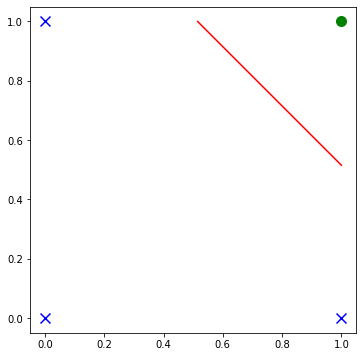

In [ ]:
# STEP 18 1-Dense 층(1뉴런) AND , OR 분류
#1801
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1
# x는 입력값
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)
## y_true 출력, 목표값

y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)   # AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32)  # OR

#2
model = tf.keras.Sequential()
# activation=tf.keras.activations.sigmoid
model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))
model.summary()

#3
# model.optimizer.lr: 0.001
##model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy']) 
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0) #silent
##print("len(model.layers):", len(model.layers)) # 1
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#4
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
print("test_loss:", test_loss)
print("test_acc:", test_acc)

y_pred = model.predict(X)
print("y_pred:", y_pred)

y_label = (y_pred> 0.5).astype(int) # Z = np.round(Z)
print("y_label:", y_label)

#5: calculate the decision boundary line, w0*x + w1*y + b = 0
##print(model.get_weights())
w0, w1 = model.layers[0].weights[0].numpy().flatten()
b = model.layers[0].bias.numpy()[0]
print("{:>.2f}*x {:+.2f}*y {:+.2f} = 0".format(w0, w1, b))

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = y_true.flatten()
##plt.scatter(X[:, 0], X[:,1], c=label, s = 100)
plt.scatter(X[label==0, 0], X[label==0, 1], marker='x', c="blue", s= 100)
plt.scatter(X[label==1, 0], X[label==1, 1], marker='o', c="green",s= 100)
##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx', markersize= 10)

def clippingLineBox(line, box):
    w0, w1, b = line
    xmin, xmax, ymin, ymax = box
    
    y0 =-(w0*xmin + b)/w1
    y1 =-(w0*xmax + b)/w1

    x0 = -(w1*ymin + b)/w0
    x1 = -(w1*ymax + b)/w0    

    xpoints = []
    ypoints = []
    if ymin <= y0 <= ymax:
        xpoints.append(xmin)
        ypoints.append(y0)
    if ymin <= y1 <= ymax:
        xpoints.append(xmax)
        ypoints.append(y1)
        
    if xmin <= x0 <= xmax:
        xpoints.append(x0)
        ypoints.append(ymin)
    if xmin <= x1 <= xmax:
        xpoints.append(x1)
        ypoints.append(ymax)
    return xpoints, ypoints
           
# clip the line against a box, and draw
xpoints, ypoints = clippingLineBox(line=(w0, w1, b), box=(0, 1, 0, 1))
plt.plot(xpoints, ypoints, color='red')
plt.show()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
1/1 - 0s - loss: 0.0308 - accuracy: 1.0000 - 223ms/epoch - 223ms/step
test_loss: 0.030819127336144447
test_acc: 1.0
1/1 [==============================] - 0s 56ms/step
y_pred: [[0.06195334]
 [0.96706814]
 [0.9745535 ]
 [0.9999413 ]]
y_label: [[0]
 [1]
 [1]
 [1]]
6.36*x +6.10*y -2.72 = 0
326/326 [==============================] - 1s 2ms/step


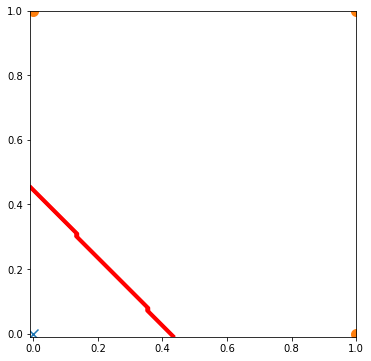

In [ ]:
#1802
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

###### AND랑 OR해보기
# y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)    # AND
y_true = np.array([[0],[1], [1],[1]], dtype = np.float32)  # OR

#2
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))
model.summary()

##model = tf.keras.Sequential()
##model.add(tf.keras.layers.Input(shape = (2,))) # shape = 2
##model.add(tf.keras.layers.Dense(units=1))
##model.add(tf.keras.layers.Activation('sigmoid'))
##model.summary()

#3
##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0)
##print("len(model.layers):", len(model.layers)) # 1
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#4
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
print("test_loss:", test_loss)
print("test_acc:", test_acc)

y_pred = model.predict(X)
print("y_pred:", y_pred)

y_label = (y_pred> 0.5).astype(int)
print("y_label:", y_label)

#5: calculate the decision boundary line, w0*x + w1*y + b = 0
##print(model.get_weights())
w0, w1 = model.layers[0].weights[0].numpy().flatten()
b = model.layers[0].bias.numpy()[0]
print("{:>.2f}*x {:+.2f}*y {:+.2f} = 0".format(w0, w1, b))

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = y_true.flatten()
##plt.scatter(X[:, 0], X[:,1], c=label, s = 100)
plt.scatter(X[label==0, 0], X[label==0,1], marker='x', s = 100)
plt.scatter(X[label==1, 0], X[label==1,1], marker='o', s = 100)

h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample) 
Z = (Z> 0.5).astype(int) # Z = np.round(Z)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
weights: [[-4.536849   3.9005349]
 [-4.8368983  3.600727 ]]
bias: [ 6.364115 -6.364118]
1/1 - 0s - loss: 0.0107 - accuracy: 1.0000 - 110ms/epoch - 110ms/step
1/1 [==============================] - 0s 42ms/step
y_pred: [[9.99997020e-01 2.96617804e-06]
 [9.86488521e-01 1.35115348e-02]
 [9.86491621e-01 1.35083115e-02]
 [1.55691030e-02 9.84430850e-01]]
y_label: [0 0 0 1]
326/326 [==============================] - 0s 1ms/step


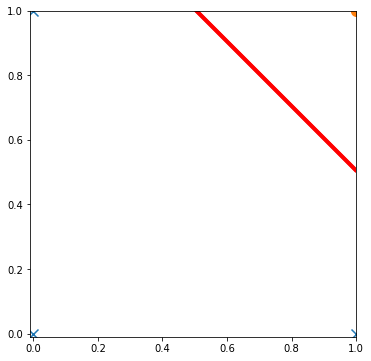

In [ ]:
# STEP 19  1-Dense 층(2뉴런) AND, OR 분류

## 뉴런 갯수만큼 출력결과가 나와야함, 여기서는 뉴런 2개이므로 출력 2개나와야함
## 그러나 y_true보면 목표 레이블은 하나 
## 그래서 2 -> 1로 만들어주는게 필요함
#1901
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)
# 목표 레이블은 하나
y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)   # AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32)  # OR

#2
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='softmax'))
model.summary()

##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt,
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0)
##print("len(model.layers):", len(model.layers)) # 1
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#3
##print(model.get_weights())
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].bias.numpy())

test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
y_pred = model.predict(X)
print("y_pred:", y_pred)

# 학습을 하고 이것을 입력....
# 뉴런이 2개라서 출력 결과가 2개 나와야하는데,
# 인덱스 값을 줌으로써 1개만 y_True에 출력 된다.
y_label = np.argmax(y_pred, axis = 1)
print("y_label:", y_label)

#4: calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = y_true.flatten()
##plt.scatter(X[:, 0], X[:,1], c=label, s = 100)
plt.scatter(X[label==0, 0], X[label==0,1], marker='x', s = 100)
plt.scatter(X[label==1, 0], X[label==1,1], marker='o', s = 100)

##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx')

h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()


y_true= [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
weights: [[-4.035913   4.7437453]
 [-4.802562   3.975454 ]]
bias: [ 6.569066 -6.569066]
1/1 - 0s - loss: 0.0093 - accuracy: 1.0000 - 138ms/epoch - 138ms/step
1/1 [==============================] - 0s 44ms/step
y_pred: [[9.99997973e-01 1.96870587e-06]
 [9.87384319e-01 1.26157161e-02]
 [9.87363756e-01 1.26361875e-02]
 [1.18965097e-02 9.88103449e-01]]
y_label: [0 0 0 1]
326/326 [==============================] - 0s 1ms/step


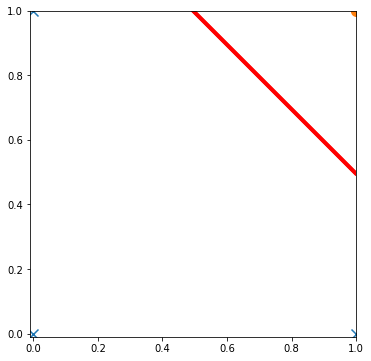

In [ ]:
#1902
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)   # AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32)  # OR
y_true = tf.keras.utils.to_categorical(y_true) 
print("y_true=", y_true)

#2
model = tf.keras.Sequential()
# unit=2니까 뉴런 2개
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='softmax'))
model.summary()

##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0)
##print("len(model.layers):", len(model.layers)) # 1
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#3
##print(model.get_weights())
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].bias.numpy())

test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
y_pred = model.predict(X)
print("y_pred:", y_pred)

y_label = np.argmax(y_pred, axis = 1)
print("y_label:", y_label)

#4 calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = np.argmax(y_true, axis = 1)
##plt.scatter(X[:, 0], X[:,1], c=label, s = 100)
plt.scatter(X[label==0, 0], X[label==0,1], marker='x', s = 100)
plt.scatter(X[label==1, 0], X[label==1,1], marker='o', s = 100)

##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx')

h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
1/1 - 0s - loss: 1.4399e-09 - accuracy: 1.0000 - 96ms/epoch - 96ms/step
326/326 [==============================] - 0s 1ms/step


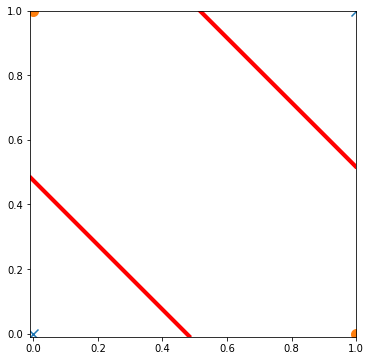

In [ ]:
# STEP20 2층 신경망 : XOR 이진 분류
#2001
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

##y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)# AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32) # OR
y_true = np.array([[0],[1],[1],[0]], dtype = np.float32)   # XOR

#2
n = 2  # 10,  number of neurons in a hidden layer
model = tf.keras.Sequential()
## 입력단자 2개...
######### 하이퍼 파라미터 -> units, input_dim, activation을 정하는 것 #######
model.add(tf.keras.layers.Dense(units=n, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

##model = tf.keras.Sequential()
##model.add(tf.keras.layers.Input(shape = (2,))) # shape = 2
##model.add(tf.keras.layers.Dense(units=n))
##model.add(tf.keras.layers.Activation('sigmoid'))
##model.add(tf.keras.layers.Dense(units=1))
##model.add(tf.keras.layers.Activation('sigmoid'))
##model.summary()


opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt,loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

# epoch = 2000번 돌리, 4개의 샘플로 가중치를 갱신
ret = model.fit(X, y_true, epochs=2000, batch_size=4, verbose=0)
##print("len(model.layers):", len(model.layers)) # 2
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#3
##print(model.get_weights())
##for i in range(len(model.layers)):
##    print("layer :", i, '-'*20)
##    w = model.layers[i].weights[0].numpy()
##    b = model.layers[i].bias.numpy()
##    print("weights[{}]: {}".format(i, np.array2string(w)))
##    print("bias[{}]:    {}".format(i, np.array2string(b)))

test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
##y_pred = model.predict(X)
##print("y_pred:", y_pred)
##
##y_label = (y_pred> 0.5).astype(int)
##print("y_label:", y_label)

#4: calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = y_true.flatten()
plt.scatter(X[label==0, 0], X[label==0,1], marker='x', s = 100)
plt.scatter(X[label==1, 0], X[label==1,1], marker='o', s = 100)
##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx')

h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = (Z> 0.5).astype(int) # Z = np.round(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()


y_true= [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 124ms/epoch - 124ms/step
326/326 [==============================] - 0s 1ms/step


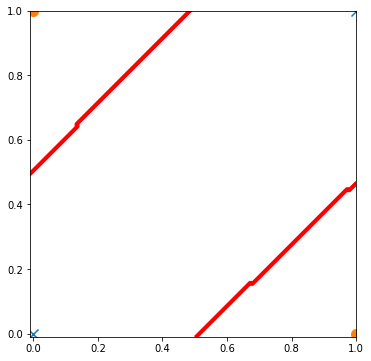

In [ ]:
#2002
#### 뉴런이 출력층이 2개 일 때
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

# loss='sparse_categorical_crossentropy'
##y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)# AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32) # OR
y_true = np.array([[0],[1],[1],[0]], dtype = np.float32)   # XOR
y_true = tf.keras.utils.to_categorical(y_true) # loss='categorical_crossentropy'
print("y_true=", y_true)

#2
model = tf.keras.Sequential()
n = 2  # number of neurons in a hidden layer
# 입력 단자
model.add(tf.keras.layers.Dense(units=n, input_dim=2, activation='sigmoid'))
# 출력 단자
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
##model.compile(optimizer=opt,
##              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ret = model.fit(X, y_true, epochs=1000, batch_size=4, verbose=0)
##print("len(model.layers):", len(model.layers)) # 2
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#3
##print(model.get_weights())
##for i in range(len(model.layers)):
##    print("layer :", i, '-'*20)
##    w = model.layers[i].weights[0].numpy()
##    b = model.layers[i].bias.numpy()
##    print("weights[{}]: {}".format(i, np.array2string(w)))
##    print("bias[{}]:    {}".format(i, np.array2string(b)))

test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
##y_pred = model.predict(X)
##print("y_pred:", y_pred)
##
##y_label = np.argmax(y_pred, axis = 1)
##print("y_label:", y_label)

#4: calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

##label = y_true.flatten()            # loss='sparse_categorical_crossentropy'
### 출력 단자가 2개 이므로 label만들어 줘야함. argmax
label = np.argmax(y_true, axis = 1) # loss='categorical_crossentropy'
plt.scatter(X[label==0, 0], X[label==0,1], marker='x', s = 100)
plt.scatter(X[label==1, 0], X[label==1,1], marker='o', s = 100)
##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx')

h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()


x =  [[ 0.22971712 -0.06117564]
 [-0.07469477 -0.10729686]
 [ 0.12238712 -0.23015387]
 [ 0.24675365 -0.07612069]
 [ 0.04511894 -0.02493704]
 [ 0.20677329 -0.20601407]
 [-0.04559668 -0.03840544]
 [ 0.16033921 -0.10998913]
 [-0.02438503 -0.08778584]
 [ 0.00596993  0.05828152]
 [-0.15565106  0.11447237]
 [ 0.12750418  0.05024943]
 [ 0.12740027 -0.06837279]
 [-0.0173793  -0.09357694]
 [-0.0378851   0.05303555]
 [-0.0978156  -0.03967535]
 [-0.0971809  -0.08452056]
 [-0.09492854 -0.00126646]
 [-0.15801154  0.02344157]
 [ 0.23473147  0.07420442]
 [-0.02712964 -0.0887629 ]
 [-0.10566414  0.16924546]
 [ 0.0071853  -0.06369956]
 [ 0.02699953  0.21002551]
 [ 0.01699304  0.06172031]
 [ 0.04245049 -0.03522498]
 [-0.16157647 -0.03493427]
 [-0.02954211  0.05866232]
 [ 0.11865017  0.09311021]
 [ 0.04038815  0.08851412]
 [-0.10668798  0.12528682]
 [ 0.07253923 -0.02980928]
 [ 0.0690869  -0.00755717]
 [ 0.16003656  0.15198168]
 [ 0.30908704 -0.13964963]
 [-0.20422853 -0.05044659]
 [ 0.02263266  0.087616

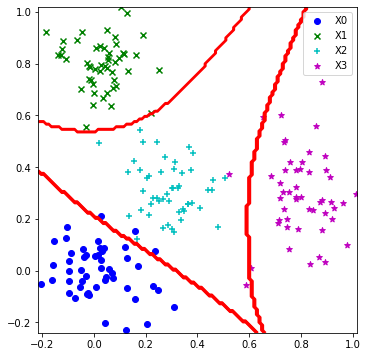

In [ ]:
#2102
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1
def createData(N=50):   
    np.random.seed(1)
    X0 = np.random.multivariate_normal(mean=[0.0, 0.0], cov= [[0.02, 0], [0, 0.01]], size=N)
    y_true0 = np.zeros(shape = (N,))

    X1 = np.random.multivariate_normal(mean=[0.0, 0.8], cov= [[0.01, 0], [0, 0.01]], size=N)
    y_true1 = np.ones(shape = (N,))

    X2 = np.random.multivariate_normal(mean=[0.3, 0.3], cov= [[0.01, 0], [0, 0.01]], size=N)
    y_true2 = np.ones(shape = (N,))*2

    X3 = np.random.multivariate_normal(mean=[0.8, 0.3], cov= [[0.01, 0], [0, 0.02]], size=N)
    y_true3 = np.ones(shape = (N,))*3

    X = np.vstack((X0, X1, X2, X3))
    y_true = np.hstack((y_true0, y_true1, y_true2, y_true3))
    return X, y_true

X, y_true = createData()   
y_true = tf.keras.utils.to_categorical(y_true) # 'mse', 'categorical_crossentropy'
##print("y_true=", y_true)

print('x = ', X)
print('y_true= ', y_true)

#2
n = 10  # number of neurons in a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=n, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))
model.summary()

##model = tf.keras.Sequential()
##model.add(tf.keras.layers.Input(shape = (2,))) # shape = 2
##model.add(tf.keras.layers.Dense(units=n))
##model.add(tf.keras.layers.Activation('sigmoid'))
##model.add(tf.keras.layers.Dense(units=4))
##model.add(tf.keras.layers.Activation('softmax'))
##model.summary()


opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
##model.compile(optimizer=opt,loss='mse', metrics=['accuracy'])
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
##model.compile(optimizer=opt,
##              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ret = model.fit(X, y_true, epochs=100, verbose=0) # batch_size=32
##print("len(model.layers):", len(model.layers))  # 2
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#3
##print(model.get_weights())
##for i in range(len(model.layers)):
##    print("layer :", i, '-'*20)
##    w = model.layers[i].weights[0].numpy()
##    b = model.layers[i].bias.numpy()
##    print("weights[{}]: {}".format(i, np.array2string(w)))
##    print("bias[{}]:    {}".format(i, np.array2string(b)))

test_loss, test_acc = model.evaluate(X, y_true, verbose=2)

y_pred = model.predict(X)
##print("y_pred:", y_pred)
y_label = np.argmax(y_pred, axis = 1)
##print("y_label:", y_label)

C = tf.math.confusion_matrix(np.argmax(y_true, axis = 1), y_label)
print("confusion_matrix(C):", C)

#4: calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

markers = "ox+*"
colors  = "bgcm"
labels  = ("X0", "X1", "X2", "X3")
##label = y_true.flatten()          # loss='sparse_categorical_crossentropy'
label = np.argmax(y_true, axis = 1) # loss='mse', 'categorical_crossentropy'
for i, k in enumerate(np.unique(label)):
    plt.scatter(X[label==k, 0], X[label==k, 1],
                c = colors[i], marker=markers[i], label = labels[i])
plt.legend()

h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()


X.shape: (150, 4)
y_true.shape: (150,)
[[4.6 3.1 1.5 0.2]
 [6.3 2.9 5.6 1.8]
 [5.  3.2 1.2 0.2]]
[0. 2. 0.]


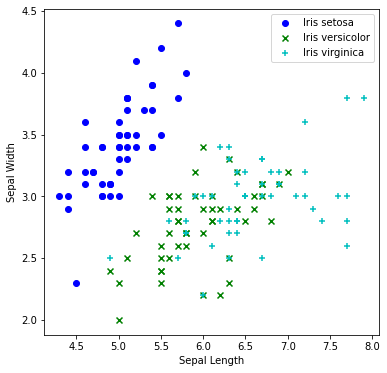

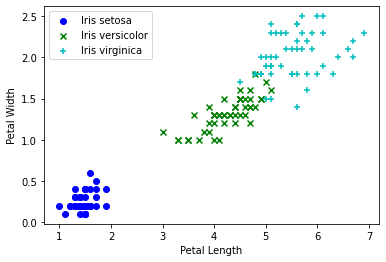

In [ ]:
#2201
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
'''
ref1: https://en.wikipedia.org/wiki/Iris_flower_data_set#Data_set
ref2: https://gist.github.com/curran/a08a1080b88344b0c8a7#file-iris-csv
'''
#1
def load_Iris(shuffle=True):   
    label={'setosa':0, 'versicolor':1, 'virginica':2}
    data = np.loadtxt("./iris.csv", skiprows=1, delimiter=',',
                      converters={4: lambda name: label[name.decode()]})
    if shuffle:
        np.random.shuffle(data)
    return data

##iris_data = load_Iris(shuffle=True)    
iris_data = load_Iris()
X      = iris_data[:,:-1]
y_true = iris_data[:, -1]
    
print("X.shape:", X.shape)
print("y_true.shape:", y_true.shape)
print(X[:3])
print(y_true[:3])

#2
markers= "ox+*sd"
colors = "bgcmyk"
labels = ["Iris setosa","Iris versicolor", "Iris virginica"]

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
for i, k in enumerate(np.unique(y_true)):
  plt.scatter(X[y_true== k, 0], # Sepal Length
              X[y_true== k, 1], # Sepal Width
              c=colors[i], marker=markers[i], label=labels[i])
plt.legend(loc='best')
plt.show()

#3
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
for i, k in enumerate(np.unique(y_true)):
  plt.scatter(X[y_true== k, 2], # Petal Length
              X[y_true== k, 3], # Petal Width
              c=colors[i], marker=markers[i], label=labels[i])
plt.legend(loc='best')
plt.show()


x_train.shape: (120, 4)
y_train.shape: (120,)
x_test.shape: (30, 4)
y_test.shape: (30,)
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                50        
                                                                 
 dense_19 (Dense)            (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
len(model.layers): 2


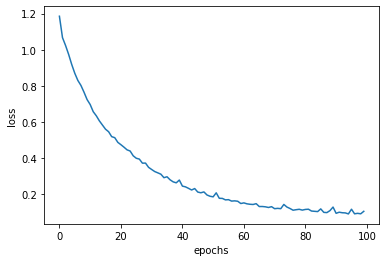

4/4 - 0s - loss: 0.0912 - accuracy: 0.9750 - 139ms/epoch - 35ms/step
1/1 - 0s - loss: 0.0813 - accuracy: 0.9667 - 17ms/epoch - 17ms/step
4/4 [==============================] - 0s 3ms/step
confusion_matrix(C): tf.Tensor(
[[40  0  0]
 [ 0 33  2]
 [ 0  1 44]], shape=(3, 3), dtype=int32)


In [ ]:
#2202
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#1
def load_Iris(shuffle=False):   
    label={'setosa':0, 'versicolor':1, 'virginica':2}
    data = np.loadtxt("./iris.csv", skiprows=1, delimiter=',',
                      converters={4: lambda name: label[name.decode()]})
    if shuffle:
        np.random.shuffle(data)
    return data

def train_test_data_set(iris_data, test_rate=0.2): # train: 0.8, test: 0.2
    n = int(iris_data.shape[0]*(1-test_rate))
    x_train = iris_data[:n,:-1]
    y_train = iris_data[:n, -1]
    
    x_test = iris_data[n:,:-1]
    y_test = iris_data[n:,-1]
    return (x_train, y_train), (x_test, y_test)
    
iris_data = load_Iris(shuffle=True)
(x_train, y_train), (x_test, y_test) = train_test_data_set(iris_data, test_rate=0.2)
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:",  x_test.shape)
print("y_test.shape:",  y_test.shape)
  
# one-hot encoding: 'mse', 'categorical_crossentropy'  
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#2
n = 10  # number of neurons in a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=n, input_dim=4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
model.summary()

#3
def MSE(y, t):
    return tf.reduce_mean(tf.square(y - t)) # (y - t)**2

CCE = tf.keras.losses.CategoricalCrossentropy()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
##model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt, loss= MSE, metrics=['accuracy'])
##model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=opt, loss= CCE, metrics=['accuracy'])

ret = model.fit(x_train, y_train, epochs=100, verbose=0) # batch_size=32
print("len(model.layers):", len(model.layers))  # 2
loss = ret.history['loss']
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

#4
##print(model.get_weights())
##for i in range(len(model.layers)):
##    print("layer :", i, '-'*20)
##    w = model.layers[i].weights[0].numpy()
##    b = model.layers[i].bias.numpy()
##    print("weights[{}]: {}".format(i, np.array2string(w)))
##    print("bias[{}]:    {}".format(i, np.array2string(b)))

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
print("confusion_matrix(C):", C)
